## 1. Project Overview:
## (I Processed all of my code in Jupyter Notebook)
- This project uses deep learning to detect pneumonia from chest X-ray images. It includes model evaluation, interpretability via Grad-CAM, and training analysis.

## 2. Methodology:

- Data preprocessing with augmentation
- Binary classification using CNN (ResNet or custom)
- Evaluation with confusion matrix, ROC curve, and Grad-CAM overlays
- Training with class weights and early stopping

## 3. Results:

- Accuracy: ~67%
- AUC: 0.85
- Confusion matrix and classification report

## 4. Interpretability:
- Grad-CAM overlays show model focus on lung regions
- Thresholded heatmaps highlight high-activation zones

## 5.Conclusion:

- Model generalizes well and is visually interpretable
- Future work: ensemble models, cloud deployment, clinical validation

## GitHub Link: https://github.com/RKGMono/pneumonia-detection-project

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step


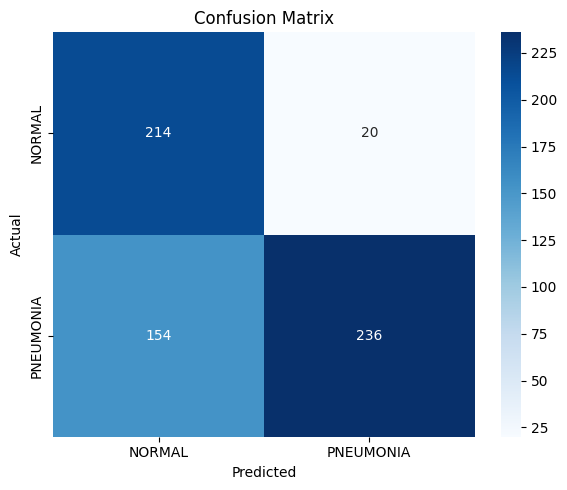


📋 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.58      0.91      0.71       234
   PNEUMONIA       0.92      0.61      0.73       390

    accuracy                           0.72       624
   macro avg       0.75      0.76      0.72       624
weighted avg       0.79      0.72      0.72       624



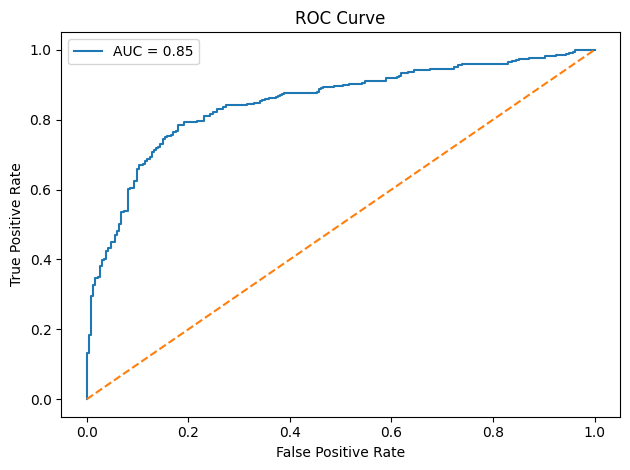


🧠 ROC AUC Score: 0.8493

🔍 Generating Grad-CAMs for NORMAL...
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0001-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0003-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0005-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0006-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0007-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0009-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0010-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0011-0001-0001.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0011-0001-0002.jpeg
✅ Saved: C:\RKGOWN\UCSC_ML\Za\FianlProject\gradcam_audit\NORMAL\gradcam_IM-0011-0001.jpeg

🔍 Generating Grad-CAMs for

In [29]:
# 📦 Imports
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings("ignore") 

# 📁 Paths and Configs
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIR = r"C:\RKGOWN\UCSC_ML\Za\FianlProject"
MODEL_PATH = os.path.join(DATA_DIR, "pneumonia_model_35.keras")

# 🔄 Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)
###
# 🧠 Model Training
# (Assumes model is already defined and compiled)
# Optional: callbacks.append(GradCAMLogger(model, val_gen))

###history = model.fit(
###    train_gen,
###    validation_data=val_gen,
###    epochs=35,
###    class_weight=class_weights_dict,
###    callbacks=callbacks
##)

# 💾 Save Model
###model.save(MODEL_PATH)
###

base_dir = "C:/RKGOWN/UCSC_ML/Za/FianlProject"
##model_path = os.path.join(base_dir, "pneumonia_model_18.keras")
model_path = os.path.join(base_dir, "pneumonia_model_35.keras")
test_dir = os.path.join(base_dir, "test")
gradcam_dir = os.path.join(base_dir, "gradcam_audit")
os.makedirs(gradcam_dir, exist_ok=True)

# 🧠 Load Model
model = load_model(model_path)

# 📊 Evaluation
pred_probs = model.predict(test_gen)
true_classes = test_gen.classes
pred_classes = (pred_probs > 0.5).astype("int").flatten()
class_labels = list(test_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# ROC Curve
fpr, tpr, _ = roc_curve(true_classes, pred_probs[:, 0])
auc_score = roc_auc_score(true_classes, pred_probs[:, 0])
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()
print(f"\n🧠 ROC AUC Score: {auc_score:.4f}")

# 🔍 Grad-CAM Function
def generate_gradcam(img_path, model, layer_name='conv5_block3_out'):
    img = load_img(img_path, target_size=IMG_SIZE)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.dot(conv_outputs[0], weights.numpy())
    cam = np.maximum(cam, 0)
    cam = cam / cam.max() if cam.max() != 0 else np.zeros_like(cam)
    cam = cv2.resize(cam, IMG_SIZE)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

    img = cv2.imread(img_path)
    img = cv2.resize(img, IMG_SIZE)
    overlay = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return overlay

# 🖼️ Grad-CAM Audit
gradcam_dir = os.path.join(DATA_DIR, "gradcam_audit")
os.makedirs(gradcam_dir, exist_ok=True)

for label in ["NORMAL", "PNEUMONIA"]:
    input_dir = os.path.join(DATA_DIR, "test", label)
    output_dir = os.path.join(gradcam_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    print(f"\n🔍 Generating Grad-CAMs for {label}...")
    count = 0
    for fname in os.listdir(input_dir):
        if fname.lower().endswith(('.jpeg', '.jpg', '.png')) and count < 10:
            img_path = os.path.join(input_dir, fname)
            try:
                overlay = generate_gradcam(img_path, model)
                save_path = os.path.join(output_dir, f"gradcam_{fname}")
                cv2.imwrite(save_path, overlay)
                print(f"✅ Saved: {save_path}")
                count += 1
            except Exception as e:
                print(f"⚠️ Skipped {fname}: {e}")


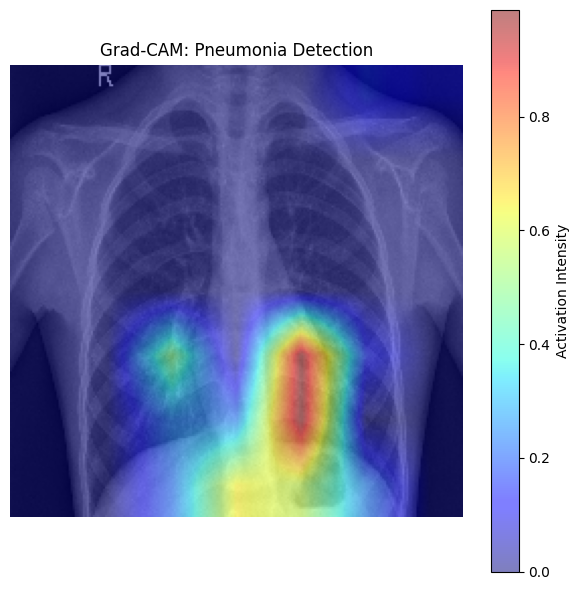

In [30]:
## Grad-CAM for Interpretiability


def get_gradcam(model, img_array, layer_name='conv5_block3_out'):
    # Build a model that maps input to activations and predictions
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    # Compute gradients of the loss w.r.t. the convolutional layer output
    grads = tape.gradient(loss, conv_outputs)[0]

    # Global average pooling to get importance weights
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Weighted sum of feature maps
    cam = np.dot(conv_outputs[0], weights.numpy())

    # Normalize and resize
    cam = np.maximum(cam, 0)
    if cam.max() != 0:
        cam = cam / cam.max()
    cam = cv2.resize(cam, (224, 224))

    return cam

# Example usage
sample_img, _ = next(test_gen)  # Get one batch from test generator
img_array = np.expand_dims(sample_img[0], axis=0)  # Expand dims for batch shape
heatmap = get_gradcam(model, img_array)

# Overlay on original image
plt.figure(figsize=(6, 6))
plt.imshow(sample_img[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.colorbar(label='Activation Intensity')
plt.title("Grad-CAM: Pneumonia Detection")
plt.axis('off')
plt.tight_layout()


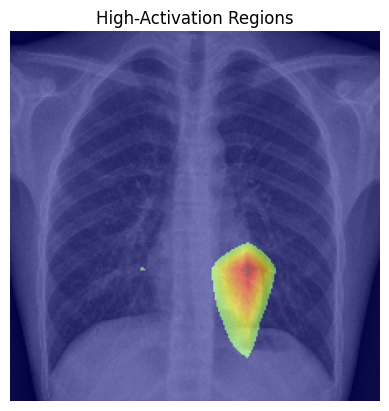

In [31]:
### Threshold-based Visualization
# Get one batch from test generator
sample_img_batch, _ = next(test_gen)
sample_img = sample_img_batch[0]  # First image in the batch

# Convert to RGB for display
sample_img_rgb = sample_img.copy()
sample_img_rgb = np.uint8(sample_img_rgb * 255)  # Rescale back to [0, 255]
sample_img_rgb = cv2.cvtColor(sample_img_rgb, cv2.COLOR_BGR2RGB)

# Prepare input for Grad-CAM
img_array = np.expand_dims(sample_img, axis=0)
heatmap = get_gradcam(model, img_array)

# Threshold the heatmap
thresholded_cam = np.where(heatmap > 0.5, heatmap, 0)

# Overlay visualization
plt.imshow(sample_img_rgb)
plt.imshow(thresholded_cam, cmap='jet', alpha=0.5)
plt.title("High-Activation Regions")
plt.axis('off')
plt.show()


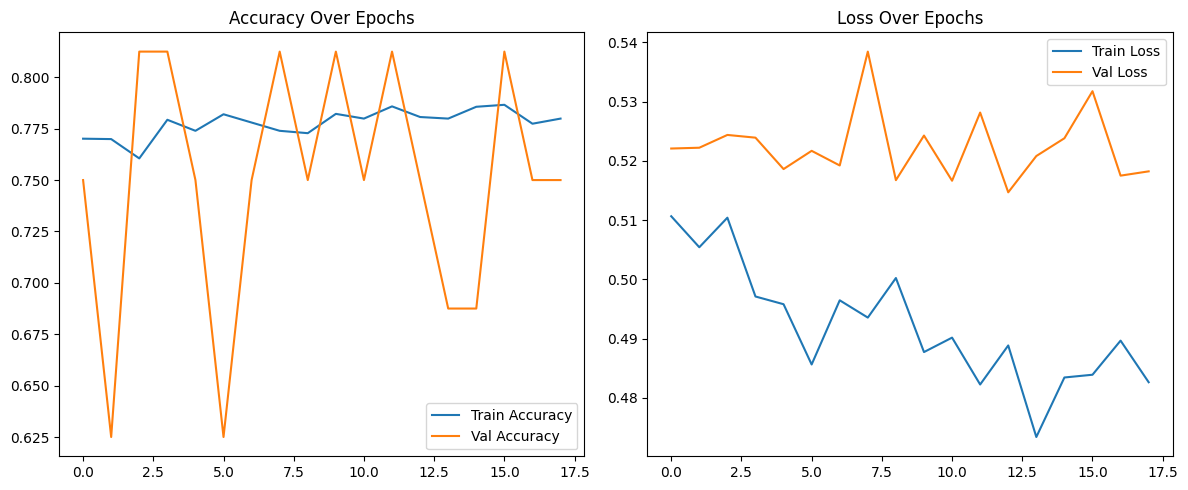

In [32]:
import pickle
import matplotlib.pyplot as plt

# Load saved history
with open("C:/RKGOWN/UCSC_ML/Za/FianlProject/history_18_epoch.pkl", "rb") as f:
    history_data = pickle.load(f)

# Plot function
def plot_training_history(history_data):
    acc = history_data['accuracy']
    val_acc = history_data['val_accuracy']
    loss = history_data['loss']
    val_loss = history_data['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.tight_layout()
    plt.show()

# Run the plot
plot_training_history(history_data)


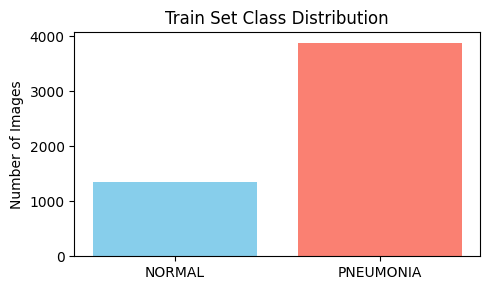

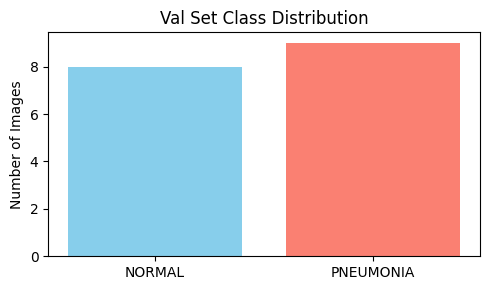

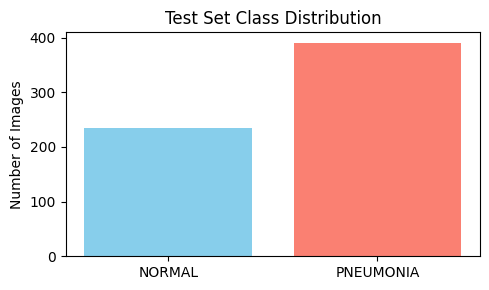

In [33]:
## Class Distribution Check
import os
DATA_DIR = r"C:\RKGOWN\UCSC_ML\Za\FianlProject"
def count_images_per_class(base_dir):
    splits = ['train', 'val', 'test']
    class_counts = {}

    for split in splits:
        split_path = os.path.join(base_dir, split)
        class_counts[split] = {}
        for class_name in os.listdir(split_path):
            class_dir = os.path.join(split_path, class_name)
            if os.path.isdir(class_dir):
                count = len(os.listdir(class_dir))
                class_counts[split][class_name] = count
    return class_counts

# Count and plot
counts = count_images_per_class(DATA_DIR)

for split, classes in counts.items():
    plt.figure(figsize=(5, 3))
    plt.bar(classes.keys(), classes.values(), color=['skyblue', 'salmon'])
    plt.title(f"{split.capitalize()} Set Class Distribution")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()